In [1]:
import pandas as pd
import numpy as np
import os
import pickle
from collections import Counter

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

In [5]:
from scipy import stats
from scipy.stats import norm, gamma, linregress, skew
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, confusion_matrix, silhouette_score, silhouette_samples

In [6]:
sns.set()

## Read Data

In [7]:
nba_df = pd.read_csv('nba_cleaned.csv')
euro_df = pd.read_csv('euro_cleaned.csv')

In [27]:
nba_cluster_dict = {1: 'Ballhandler (Iso)', 0: 'Ballhandler',
                    2: 'Big', 7: 'Big', 3: 'Big',
                    6: 'Wing', 4: 'Wing', 5: 'Wing'}
nba_cluster_order = [1, 0, 6, 4, 5, 3, 2, 7]

In [28]:
euro_cluster_dict = {0: 'Ballhandler (Iso)', 7: 'Ballhandler', 1: 'Ballhandler',
                     6: 'Big', 3: 'Big', 4: 'Big',
                     2: 'Wing', 5: 'Wing'}
euro_cluster_order = [0, 7, 1, 5, 2, 4, 6, 3]

## Functions

In [29]:
def color_cluster(val, cluster_dict):
    if cluster_dict[val] == 'Ballhandler':
        return '#AB3B3A'
    elif cluster_dict[val] == 'Wing':
        return '#2E5C6E'
    elif cluster_dict[val] == 'Big':
        return '#F7D94C'

## Viz

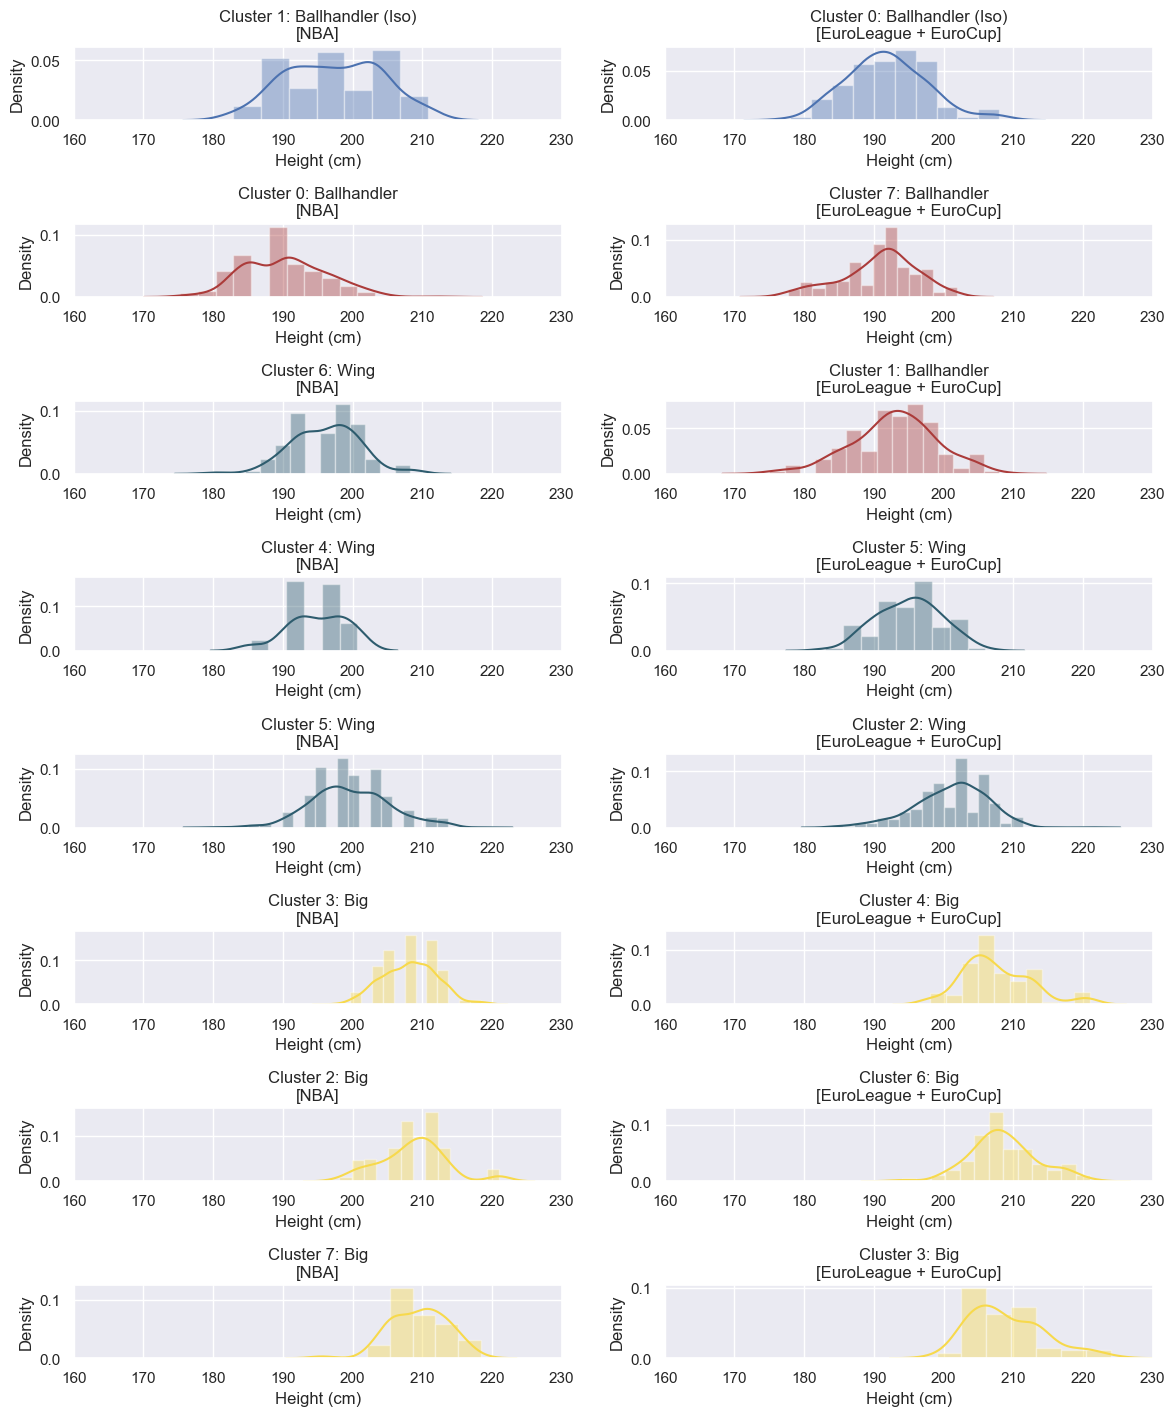

In [30]:
figsize(12, 28)
n_clusters = 8
for idx in range(n_clusters):
    cluster = nba_cluster_order[idx]
    color = color_cluster(cluster, nba_cluster_dict)
    plt.subplot(n_clusters*2, 2, idx*2+1)
    sns.distplot(nba_df[nba_df['player_cluster'] == cluster]['height_cm'],
                 color=color)
    plt.title(f'Cluster {cluster}: {nba_cluster_dict[cluster]}\n[NBA]')
    plt.xlabel('Height (cm)')
    plt.xlim(160, 230)
    
    plt.subplot(n_clusters*2, 2, idx*2+2)
    cluster = euro_cluster_order[idx]
    color = color_cluster(cluster, euro_cluster_dict)
    sns.distplot(euro_df[euro_df['player_cluster'] == cluster]['Height'],
                 color=color)
    plt.title(f'Cluster {cluster}: {euro_cluster_dict[cluster]}\n[EuroLeague + EuroCup]')
    plt.xlabel('Height (cm)')
    plt.xlim(160, 230)
    
plt.tight_layout()